In [1]:
from tensorflow import keras
from keras.layers import (
    Flatten,
    Dense,
    Attention,
    Conv2D,
    Input,
)
import tensorflow_datasets.public_api as tfds
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

In [2]:
# Создаём датасет с цветочками
# (лучше загрузить свой с инета)
data_dir = tf.keras.utils.get_file(origin="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
                                   fname="flower_photos",
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [3]:
# Константы
batch_size = 32
img_height = 180
img_width = 180

In [4]:
# Разбиваем датасет на тернировочную группу и группу валидации
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=5432,
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=5432,
)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [5]:
# Немного о самих данных
class_names = train_data.class_names
print("Разделение данных", class_names)

image_count = len(list(data_dir.glob('*/*.jpg')))
print("Количество картинок:", image_count)

Разделение данных ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Количество картинок: 3670


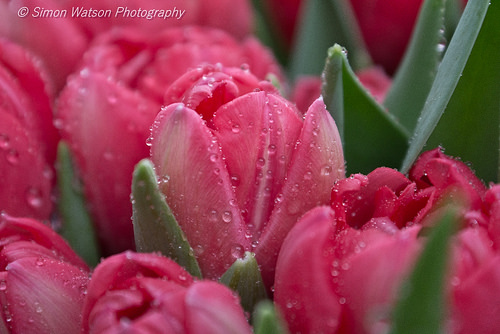

In [7]:
# Визуализирование данных
import PIL
from random import randint
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[randint(0, 100)]))

In [8]:
# Модель
general_input = Input(batch_input_shape=(batch_size, img_height, img_width, 3))
encoder = keras.Sequential([
    general_input,
    Conv2D(50, (3, 3), 1, padding="same", activation="tanh"),
    Conv2D(100, (3, 3), 1, padding="same", activation="tanh"),
    Conv2D(150, (3, 3), 1, padding="same", activation="tanh"),
    Flatten(),
    Dense(500),
    Dense(200),
    Dense(100),
    Dense(50),
])
middle_layer = Dense(10)
encoder = keras.Model(encoder)

decoder = keras.Sequential([
    Input(batch_input_shape=(batch_size, 10, 3)),
    Dense(50),
    Dense(100),
    Dense(200),
    Dense(500),
])
decoder = keras.Model(
    encoder,
    decoder
)

autoencoder = keras.Model(
    general_input,
    decoder,
)

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[4860000,500] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]